## 範例重點
* 了解如何 reset Tensorflow Graph
* 學習如何以迴圈方式訓練不同超參數的模型
* 學習如何以迴圈方式繪圖

In [8]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [9]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [10]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [11]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 20
BATCH_SIZE = 256
MOMENTUM = 0.95

In [14]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:], num_neurons=[32, 64, 128])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 32)                98336     
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                2112      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               8320      
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 110,058
Trainable params: 110,058
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 33us/step - loss: 2.1554 - acc: 0.2106 - val_loss: 1.9963 - val_acc: 0.2726
Epoch 2/20
50000/50000 [==============================] - 2s 31us/step - loss: 1.9236 - acc: 0.3136 - val_loss: 1.8771 - val_acc: 0.3321
Epoch 3/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.8419 - acc: 0.3459 - val_loss: 1.8125 - val_acc: 0.3533
Epoch 4/20
50000/50000 [==============================] - 1s 30us/step - loss: 1.7907 - acc: 0.3625 - val_loss: 1.7678 - val_acc: 0.3758
Epoch 5/20
50000/50000 [==============================] - 1s 30us/step - loss: 1.7517 - acc: 0.3758 - val_loss: 1.7294 - val_acc: 0.3843
Epoch 6/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.7200 - acc: 0.3864 - val_loss: 1.7054 - val_acc: 0.3925
Epoch 7/20
50000/50000 [==============================] - 1s 30us/step - loss: 1.6899 - acc: 0.3973 - val_loss: 1.6697 - val_acc

50000/50000 [==============================] - 2s 36us/step - loss: 2.2882 - acc: 0.1217 - val_loss: 2.2856 - val_acc: 0.1245
Epoch 5/20
50000/50000 [==============================] - 2s 32us/step - loss: 2.2840 - acc: 0.1227 - val_loss: 2.2812 - val_acc: 0.1262
Epoch 6/20
50000/50000 [==============================] - 2s 31us/step - loss: 2.2797 - acc: 0.1224 - val_loss: 2.2768 - val_acc: 0.1243
Epoch 7/20
50000/50000 [==============================] - 2s 31us/step - loss: 2.2753 - acc: 0.1228 - val_loss: 2.2724 - val_acc: 0.1243
Epoch 8/20
50000/50000 [==============================] - 2s 34us/step - loss: 2.2712 - acc: 0.1241 - val_loss: 2.2683 - val_acc: 0.1262
Epoch 9/20
50000/50000 [==============================] - 2s 35us/step - loss: 2.2673 - acc: 0.1268 - val_loss: 2.2646 - val_acc: 0.1295
Epoch 10/20
50000/50000 [==============================] - 2s 31us/step - loss: 2.2636 - acc: 0.1310 - val_loss: 2.2610 - val_acc: 0.1348
Epoch 11/20
50000/50000 [==========================

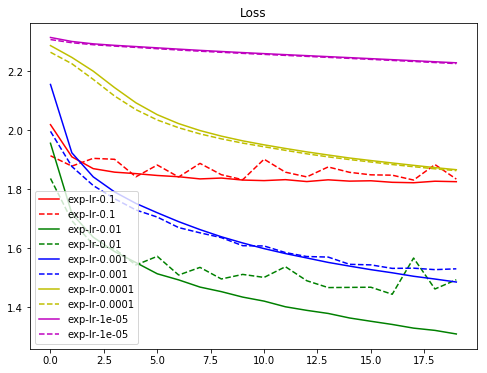

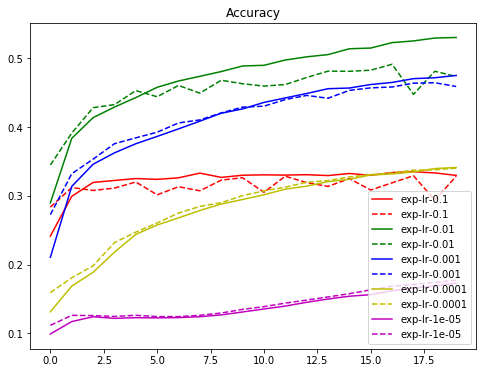

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現